In [1]:
import cv2
import glob
import numpy as np

images = np.array([cv2.imread(file, 0) for file in glob.glob("data/textures/*.tif")])
images = np.array([cv2.resize(images[i], dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
                   for i in range(len(images))])

images = images.astype(np.float32) / 255

print('shape:     ', images.shape)
print('min value: ', np.amin(images))
print('max value: ', np.amax(images))

shape:      (112, 128, 128)
min value:  0.0
max value:  1.0


In [2]:
r = images.shape[1] / 2
r2 = r * r

for i in range(images.shape[1]):
    for j in range(images.shape[2]):
        if ((i - r)*(i - r) + (j - r)*(j - r) >= r2):
            images[:,i,j] = 0.0

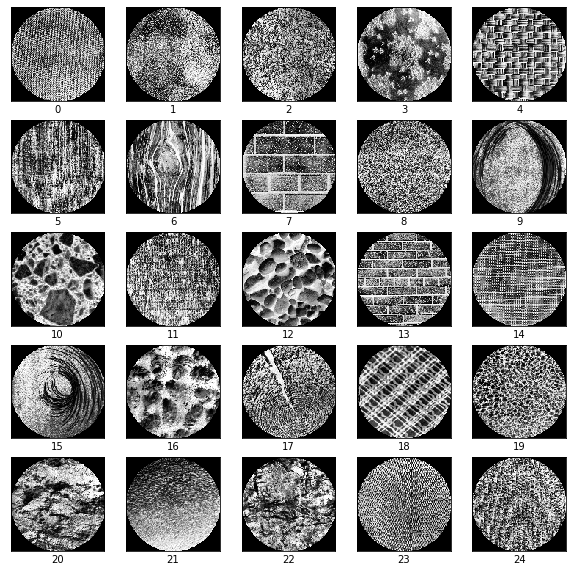

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap='gray')
    plt.xlabel(i)

In [4]:
import math
import pink

som_dim = 4
neuron_dim = images.shape[1]
euclid_dim = int(images.shape[1] * math.sqrt(2.0) / 2.0)
print("neuron_dim = ", neuron_dim)
print("euclid_dim = ", euclid_dim)

np_som = np.random.rand(som_dim, som_dim, neuron_dim, neuron_dim).astype(np.float32)
som = pink.SOM(np_som)

data = [pink.Data(images[i]) for i in range(len(images))]

trainer = pink.Trainer(som, pink.GaussianFunctor(0.5, 0.2),
                       euclidean_distance_dim=euclid_dim,
                       number_of_rotations=180)

neuron_dim =  128
euclid_dim =  90


In [5]:
from tqdm.notebook import trange

for iter in trange(10):
    for i in range(len(images)):
        trainer(data[i])

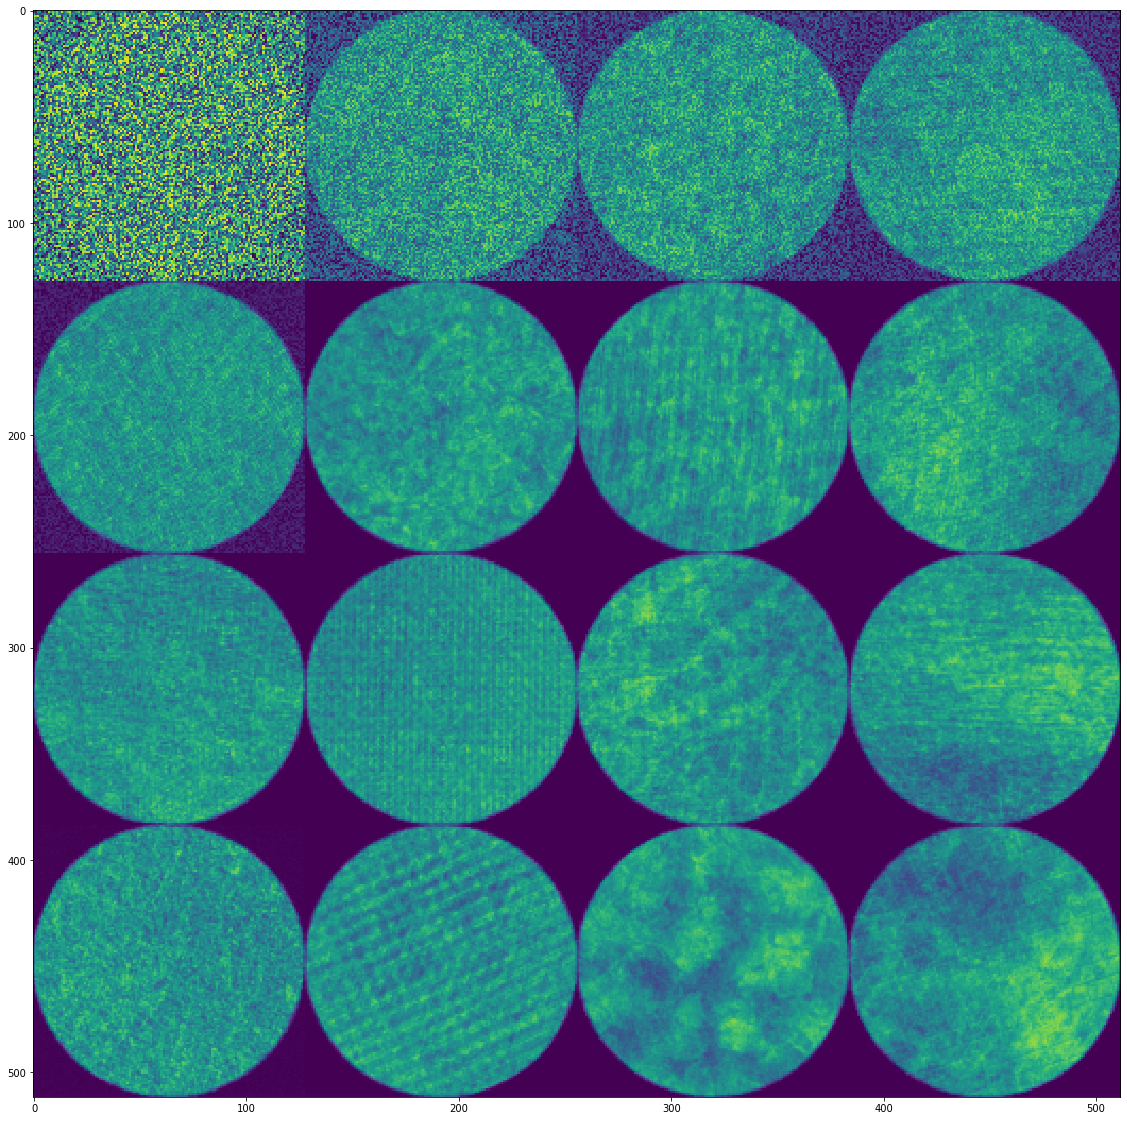

In [6]:
trainer.update_som()
np_som = np.array(som, copy=True)

plt.figure(figsize=(20,20))
plt.imshow(np_som.swapaxes(1, 2).reshape((som_dim * neuron_dim, som_dim * neuron_dim)))
plt.grid(False)